In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.utils import shuffle


def getKaggleMNIST():
    # column 0 is labels
    # column 1-785 is data with values 0..255
    # total size of csv: (42000, 1, 28, 28)
    train = pd.read_csv("./data/mnist.csv").values.astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000, 1:]/255
    Ytrain = train[:-1000, 0].astype(np.int32)

    Xtest = train[-1000:, 1:]/255
    Ytest = train[:-1000, 0].astype(np.int32)

    return Xtrain, Ytrain, Xtest, Ytest

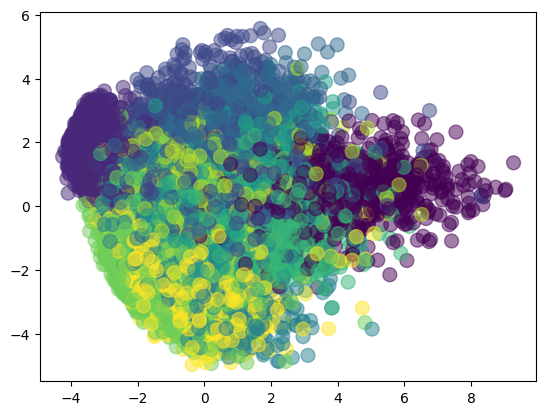

In [5]:
Xtrain, Ytrain, Xtest, YTest = getKaggleMNIST()
pca = PCA() 

reduced = pca.fit_transform(Xtrain) 

# first + second (most important) columns
# colors: all 0s are the same color, all 1s are different color
plt.scatter(reduced[:, 0], reduced[:, 1], s=100, c=Ytrain, alpha=0.5)
plt.show()

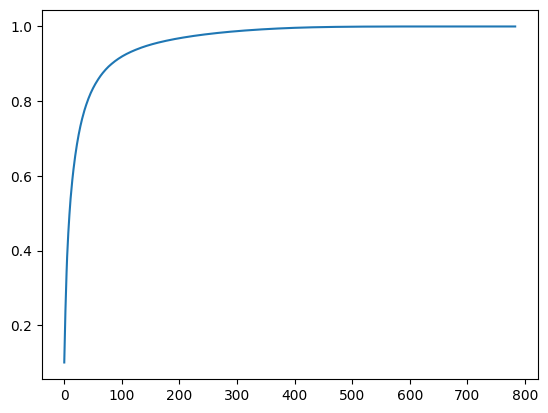

In [7]:
# cumulative variance 
# choose k = number of dimension s that gives us 95-99% variance 
cumulative = []
last = 0 

# eigenvalues
for v in pca.explained_variance_ratio_: 
    cumulative.append(last + v) 
    last = cumulative[-1] 

# total variance for choosen number of principal components
# = max number of columns
plt.plot(cumulative) 
plt.show() 